
---

<a id = 0></a>
<h1 align="center"><font color = Purple>Fake Reddit Prediction</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

---


## **Problem Defination:**
The spread of misinformation on social media platforms is an ever-growing problem. Organizations, politicians, individuals looking for personal gain and even certain news media outlets engage in propagating fake news to sway people's decisions as well as distorting events to fit a bias or prejudice. The degree of authenticity of the news posted online cannot be definitively measured, since the manual classification of news is tedious and time-consuming and is also subject to bias. To tackle the growing problem, detection, classification and mitigation tools are a need of the hour.

---

## **Methodology**
The categories, bs (i.e. bullshit), junksci(i.e. junk science), hate, fake, conspiracy, bias, satire and state declare the
category under which untrustworthy or false news fall under.

#### **1. Load Dataset**

#### **2. Text Preprocessing**
* Taking care of null/missing values .
* Text Translation to English.
* Remove links,tags, single letters, and numbers.
* Uppercase to lowercase.
* Tokenization.
* Stop Word Removal, Stemming using the Natural Language Toolkit Library.

### **3. Visualization**
* Draw WordCloud.
* Bar plot for number of words in each text.
* N-Gram Analysis and plotting using bars.

#### **4. Feature engineering**
1. Using TF-IDF
2. Using CountVectorizer

#### **5. TF-IDF Modeling**

a. Using models without kfolds:

* BernoulliNB
* MultinomialNB
* GaussianNB
* CalibratedClassifierCV
* LogisticRegression
* RandomForestClassifier
* XGBClassifier
* MLPClassifier

b. Using RandomSearch with Pipline:

 * LogisticRegression
 * RandomForestClassifier

c. Using BaysianSearch With pipline:

 * XGBClassifier
 * MultinomialNB

#### **6. CountVectorizer Modeling**
a. Using models without kfolds:

* BernoulliNB
* MultinomialNB
* CalibratedClassifierCV
* LogisticRegression
* RandomForestClassifier
* XGBClassifier
* MLPClassifier

b. Using RandomSearch with Pipline:

 * LogisticRegression
 * RandomForestClassifier

c. Using BaysianSearch With pipline:

 * XGBClassifier
 * MultinomialNB

#### **7.Train best Model on translated text**

#### **8. Predict the test set and submit**
---

## **Input:**

The input for the model is a dataset for the competition consists of two CSV files: `xy_train.csv` with 60,000 rows representing the training data with labels, and `x_test.csv` with 59,151 rows representing the test data without labels.

---

## **Output:**
The output of the fake news detection problem on Reddit is a binary classification model that can accurately predict whether a given Reddit post is real or fake news based on its title and other relevant information.

---



## **Required Data Mining Function:**

The required data mining function for the fake news detection problem on Reddit involves a combination of feature engineering, model selection and training, hyperparameter tuning, and evaluation.

### **Feature engineering:**
- TF-IDF and CountVectorizer.

#### **Model selection and training:**
* BernoulliNB
* MultinomialNB
* GaussianNB
* CalibratedClassifierCV
* LogisticRegression
* RandomForestClassifier
* XGBClassifier
* MLPClassifier

#### **Hyperparameters Tunning:**
* Using RandomSearch
* Using BayesSearch

#### **Evaluations:**

* Calculating accuracy
* Calculating F1 score
* Calculating AUC
* Calculating Confusion Matrix

---


## **Challenges**


The fake news detection problem on Reddit poses several challenges, including:

- **Ensuring data quality**, dealing with missing data, outliers, and ensuring representative data.

- **Overfitting**, preventing the model from fitting noise in the training data.

- **Model complexity**, selecting the appropriate architecture and hyperparameters.

- **Interpretability**, understanding the model's predictions and important features.

- **Text preprocessing:** Text data can be messy and require extensive preprocessing, including handling null/missing values, translating text to English, removing links and tags, and tokenization.

- **Model selection and hyperparameter tuning:** Choosing an appropriate machine learning algorithm for binary classification, and tuning its hyperparameters, can be a challenging task.

---



## **Impact**

The impact of successfully detecting fake news on Reddit can be significant.

- It can help prevent the spread of misinformation and promote transparency and reliability in the information shared on social media platforms. By accurately detecting and flagging fake news posts, users can be more informed and better equipped to make decisions based on trustworthy information.

- It can help protect individuals and communities from the negative consequences of fake news, such as political polarization, social unrest, and economic harm. By identifying and countering false narratives, the impact of fake news can be minimized.

- It can help maintain the integrity of the Reddit platform and other social media platforms. If users perceive that the platform is rife with fake news and misinformation, they may be less likely to use it or trust the information shared on it.

Overall, the impact of successfully detecting fake news on Reddit can be far-reaching and have positive implications for individuals, communities, and society as a whole.


---

## **Ideal Solution:**

- The ideal solution for the fake news detection problem on Reddit involves creating a Naive Bayes model with a Laplace smoothing parameter of 1.0 and a moderate selection of informative features , trained on a labeled dataset using TF-IDF as the feature extraction technique.

- The resulting model achieves a score of **auc = 0.8517**. This model can be used to predict whether a given Reddit post is real or fake news based on its features, with a high degree of accuracy.



---

<a id = 0></a>
<h1 align="center"><font color = Purple>SETUP</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

---

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/cisc-873-dm-w23-a3/sample_submission.csv
/kaggle/input/cisc-873-dm-w23-a3/x_test.csv
/kaggle/input/cisc-873-dm-w23-a3/xy_train.csv


In [ ]:
import numpy as np
import pandas as pd
import datetime
import pickle
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns

from IPython.core.display import HTML
from collections import OrderedDict
from colorama import Fore, Back, Style
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix,classification_report,roc_auc_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier

import keras
from keras.preprocessing import text,sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from skopt import BayesSearchCV


In [ ]:
# some seeting for pandas and hvplot
pd.options.display.max_columns = 100
pd.options.display.max_rows = 300
pd.options.display.max_colwidth = 100
np.set_printoptions(threshold=2000)

In [ ]:
np.set_printoptions(edgeitems=30, linewidth=100000,
    formatter=dict(float=lambda x: "%.3g" % x))

In [ ]:
sns.set_style("whitegrid")
sns.set_palette("pastel")

In [ ]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=8090a11d193e9334909964150db3cd5da02be16455dd1f4d76528480af07ce81
  Stored in directory: /root/.cache/pip/wheels/61/f7/ef/4d5c03c448eb8583bc063caca7e8802d8801af40c65e9b8022
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0

In [ ]:
!pip install scikit-optimize

---
<a id = 1></a>
<h1 align="center"><font color = Purple>1. Load and Check Data</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

---

In [ ]:
train_data = pd.read_csv('/kaggle/input/cisc-873-dm-w23-a3/xy_train.csv')
train_data

,id,text,label
0,265723,"A group of friends began to volunteer at a homeless shelter after their neighbors protested. ""Se...",0
1,284269,"British Prime Minister @Theresa_May on Nerve Attack on Former Russian Spy: ""The government has c...",0
2,207715,"In 1961, Goodyear released a kit that allows PS2s to be brought to heel. https://m.youtube.com/w...",0
3,551106,"Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | ""As the ...",0
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...",0
...,...,...,...
59995,70046,"Finish Sniper Simo H盲yh盲 during the invasion of Finland by the USSR (1939, colorized)",0
59996,189377,"Nigerian Prince Scam took $110K from Kansas man; 10 years later, he's getting it back",1
59997,93486,Is It Safe To Smoke Marijuana During Pregnancy? You鈥檇 Be Surprised Of The Answer | no,0
59998,140950,Julius Caesar upon realizing that everyone in the room has a knife except him (44 bc),0


---
<a id = 2></a>
<h1 align="center"><font color = Purple>2. Data Preprocessing</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

---

the text cleaning steps performed by the function:

1. Remove any URLs from the text.
2. Keep only ASCII characters and whitespace, and remove any digits.
3. Remove any single letter characters (e.g., 'a', 'I').
4. Convert all whitespace characters (e.g., tabs, newlines) to a single space character.
5. If for_embedding is False:
    - Convert all characters to lowercase.
    - Remove any stopwords (i.e., common words that do not carry much meaning, such as 'a', 'the', 'in', etc.).
    - Perform stemming (i.e., reduce words to their base form, such as 'running' to 'run').

In [ ]:
# Check for missing values
print("Number of Missing Data:",train_data.isnull().sum().sum())

# Check for duplicate values
print("Number of Duplicated Data:", train_data.duplicated().sum())


Number of Missing Data: 0
Number of Duplicated Data: 0


## **2.1 Explore labels categories**

In [ ]:
labels = train_data["label"].value_counts()
print(labels)

0    32172
1    27596
2      232
Name: label, dtype: int64


> **OBSERVATION**: 232 sample have label = 2 (noisy), i will drop them

In [ ]:
train_data = train_data[train_data["label"] != 2]

In [ ]:
labels = train_data["label"].value_counts()
print(labels)

0    32172
1    27596
Name: label, dtype: int64


## **2.2 Translate the articals to english**

In [ ]:
%%time
# translate the different language in summary
from googletrans import Translator

translator = Translator()
train_data['translated_text'] = [translator.translate(x, dest='en').text for x in train_data['text']]

CPU times: user 5min 58s, sys: 36.1 s, total: 6min 34s
Wall time: 37min 57s


## **2.3 Data Cleaning Using Regex**

- Remove non-alphanumeric characters: `[^a-zA-Z0-9\s]`
- Remove punctuation: `[^\w\s]`
- Remove extra whitespace: `\s+`
- Remove digits: `\d+`
- Remove URLs: `https?:\/\/\S+`
- Remove email addresses: `\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b`
- Remove HTML tags: `<[^>]*>`

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stemmer = SnowballStemmer("english")
stop_words = set(stopwords.words("english"))

In [ ]:
def clean_text(text, for_embedding=False):
    """ steps:
        - remove any URL
        - Keep only ASCII and whitespace, no digits
        - remove single letter chars
        - convert all whitespaces (tabs etc.) to single wspace
        if not for embedding (but e.g. tdf-idf):
        - all lowercase
        - remove stopwords, punctuation and stemm
    """
    RE_URLS = re.compile(r"www\.\S+|https?://\S+", re.IGNORECASE)
    RE_EMAIL = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b',  re.IGNORECASE)
    RE_WSPACE = re.compile(r"\s+", re.IGNORECASE)
    RE_TAGS = re.compile(r"<[^>]+>", re.IGNORECASE)
    RE_ASCII = re.compile(r"[^A-Za-z ]", re.IGNORECASE)
    RE_SINGLECHAR = re.compile(r"\b[A-Za-z]\b", re.IGNORECASE)
    if for_embedding:
        # Keep punctuation
        RE_ASCII = re.compile(r"[^A-Za-z,.!? ]", re.IGNORECASE)
        RE_SINGLECHAR = re.compile(r"\b[A-Za-z,.!?]\b", re.IGNORECASE)

    text = re.sub(RE_URLS, " ", text)
    text = re.sub(RE_EMAIL, " ", text)
    text = re.sub(RE_TAGS, " ", text)
    text = re.sub(RE_ASCII, " ", text)
    text = re.sub(RE_SINGLECHAR, " ", text)
    text = re.sub(RE_WSPACE, " ", text)

    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    if for_embedding:
        # no stemming, lowering and punctuation / stop words removal
        words_filtered = word_tokens
    else:
        words_filtered = [stemmer.stem(word) for word in words_tokens_lower if word not in stop_words ]

    text_clean = " ".join(words_filtered)
    return text_clean

In [ ]:
%%time
import re
train_data["clean_text"] = train_data["text"].\
                                    map(lambda x: clean_text(x, for_embedding=False) \
                                    if isinstance(x, str) else x)

CPU times: user 26.2 s, sys: 14.8 ms, total: 26.2 s
Wall time: 26.2 s


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
%%time
train_data["clean_translated_text"] = train_data["translated_text"].\
                                    map(lambda x: clean_text(x, for_embedding=False) \
                                    if isinstance(x, str) else x)

CPU times: user 25.6 s, sys: 21.6 ms, total: 25.6 s
Wall time: 25.7 s


> **OBSERVATION:**
This transformation has a few benefits:
1. Removing characters and words that don't hold much meaning reduces the size of our data.

2. It can improve prediction performance when modeling by lowering the noise in the data. This is because e.g. stop words like prepositions or punctuation won't allow our model to extract additional information.

3. By stemming and lower casing words we make sure that similar words are treated identically. Thus, we can improve model performance again by increasing the number of relevant data points.  

---
<a id = 3></a>
<h1 align="center"><font color = Purple>3. Visualization</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

---

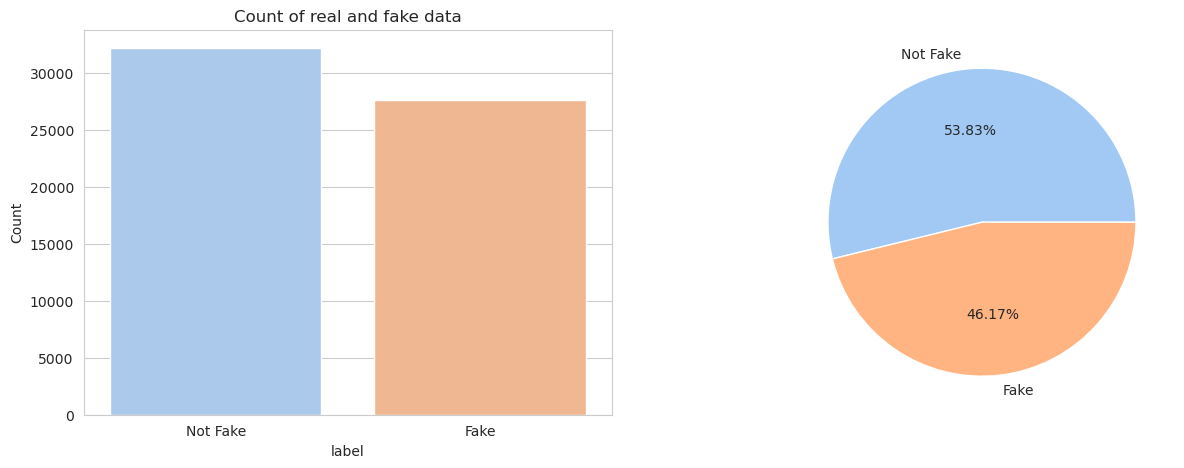

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
f1 = sns.countplot(x='label', data=train_data,ax=ax[0])
f1.set_xticklabels(['Not Fake','Fake'])
f1.set_title("Count of real and fake data")
f1.set_ylabel("Count")
f1.set_xlabel("label")
f2 = plt.pie(labels.values,labels = ['Not Fake','Fake'],autopct='%1.2f%%')

fig.show()

## **3.1 WordCloud for Real News**

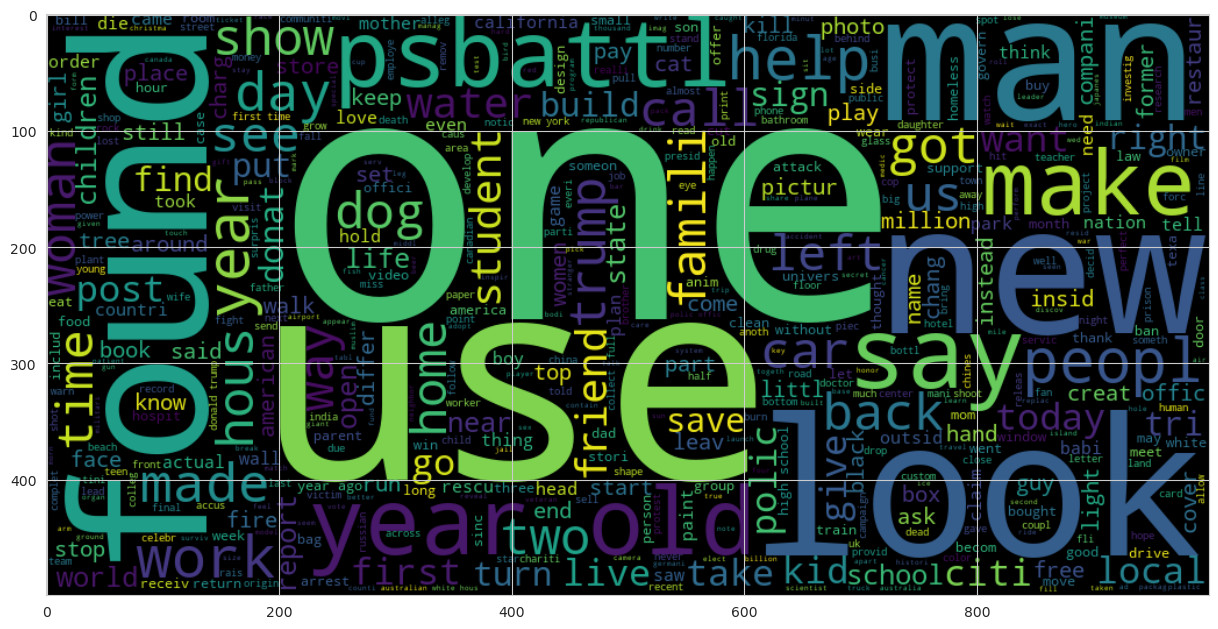

In [ ]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize=(15,15))
wc=WordCloud(max_words = 500, width = 1000, height=500, stopwords=STOPWORDS)\
    .generate(" ".join(train_data[train_data.label == 1].clean_text))
plt.imshow(wc, interpolation = 'bilinear')

## **3.2 WordCloud for Fake News**

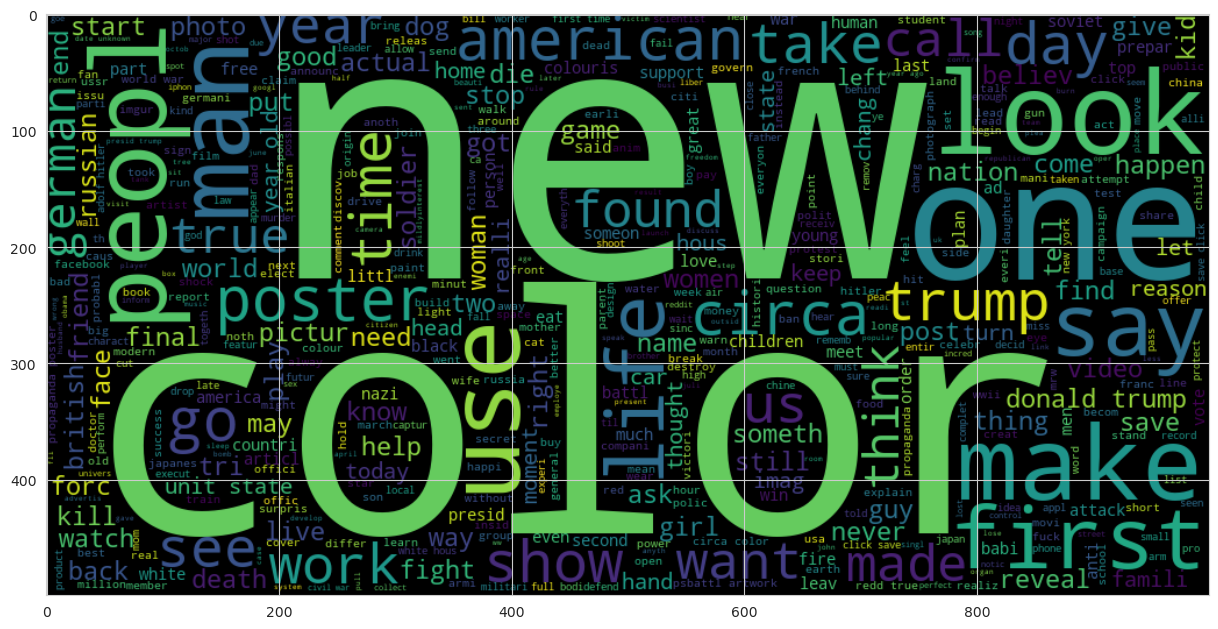

In [ ]:
plt.figure(figsize=(15,15))
wc=WordCloud(max_words = 500, width = 1000, height=500, stopwords=STOPWORDS)\
    .generate(" ".join(train_data[train_data.label == 0].clean_text))
plt.imshow(wc, interpolation = 'bilinear')

## **3.3 Number of words in each text**

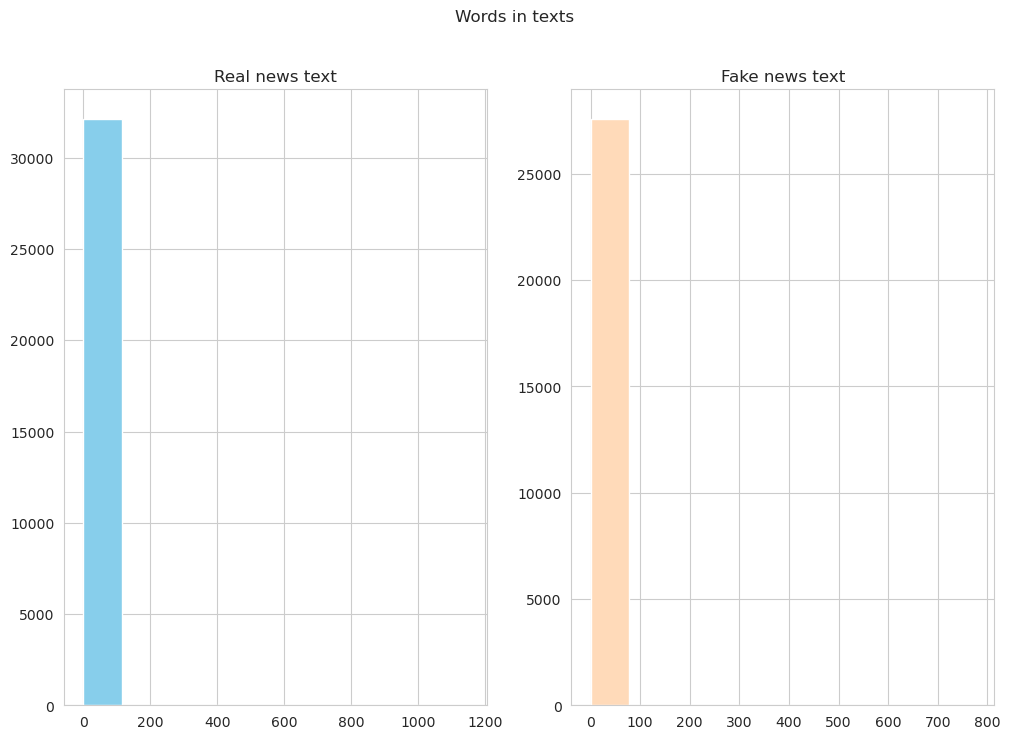

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))

text_len=train_data[train_data['label']==0]['clean_text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='SkyBlue')
ax1.set_title('Real news text')

text_len=train_data[train_data['label']==1]['clean_text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='PeachPuff')
ax2.set_title('Fake news text')
fig.suptitle('Words in texts')
plt.show()

> **OBSERVATION:** The number of words seems to be a bit different. 35000 words  are most common in real news category while around 27000 words are most common in fake news category.

## **3.3 N-Gram Analysis**

In [ ]:
whole_text = ' '.join(train_data['clean_text'])

In [ ]:
all_words = whole_text.split(' ')

In [ ]:
def draw_n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:15]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))

    return sns.barplot(x='count',y='word', data=n_gram_df)

### **3.3.1 Unigram Analysis**

      word  count
0  (year,)   4128
1   (one,)   3285
2  (like,)   3128
3   (new,)   2998
4  (look,)   2847


<AxesSubplot:xlabel='count', ylabel='word'>

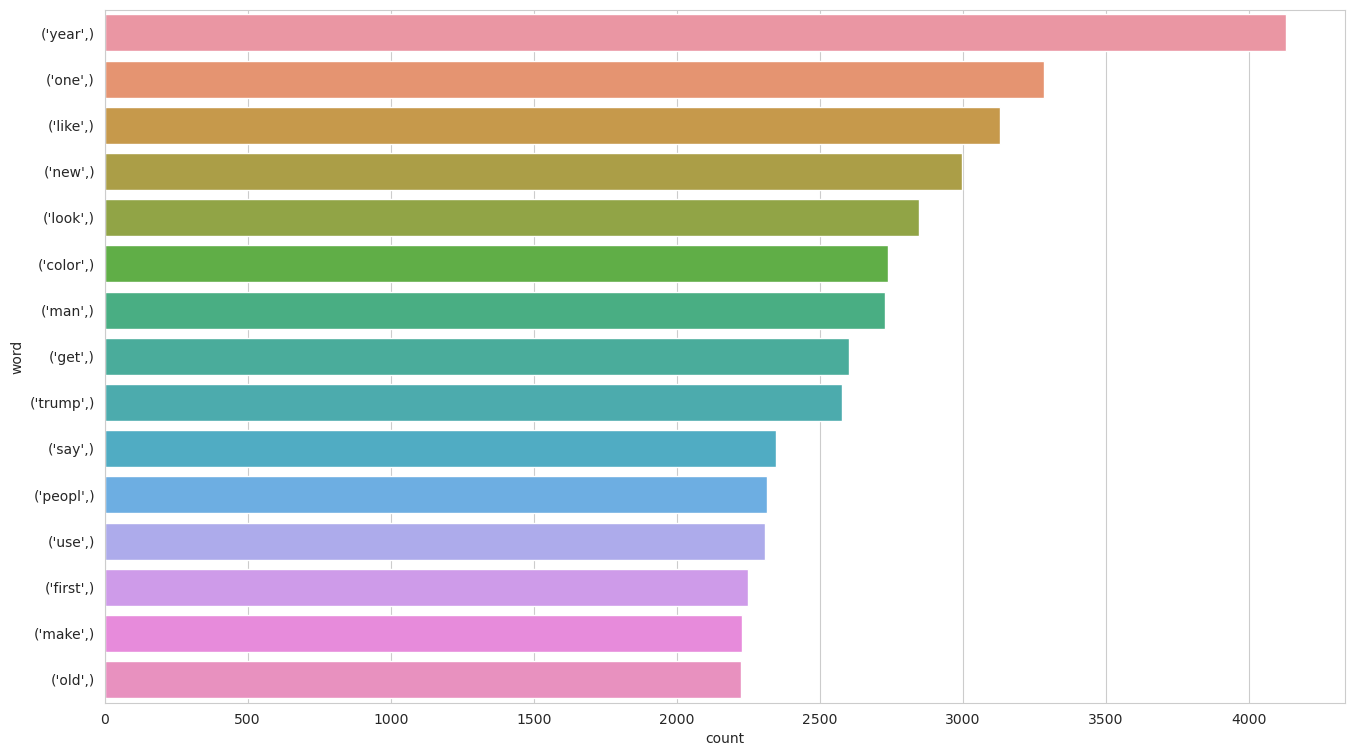

In [ ]:
draw_n_gram(all_words,1)

### **3.3.2 Bigram Analysis**

              word  count
0     (look, like)   1436
1      (year, old)   1257
2  (donald, trump)    722
3    (unit, state)    426
4      (new, york)    376


<AxesSubplot:xlabel='count', ylabel='word'>

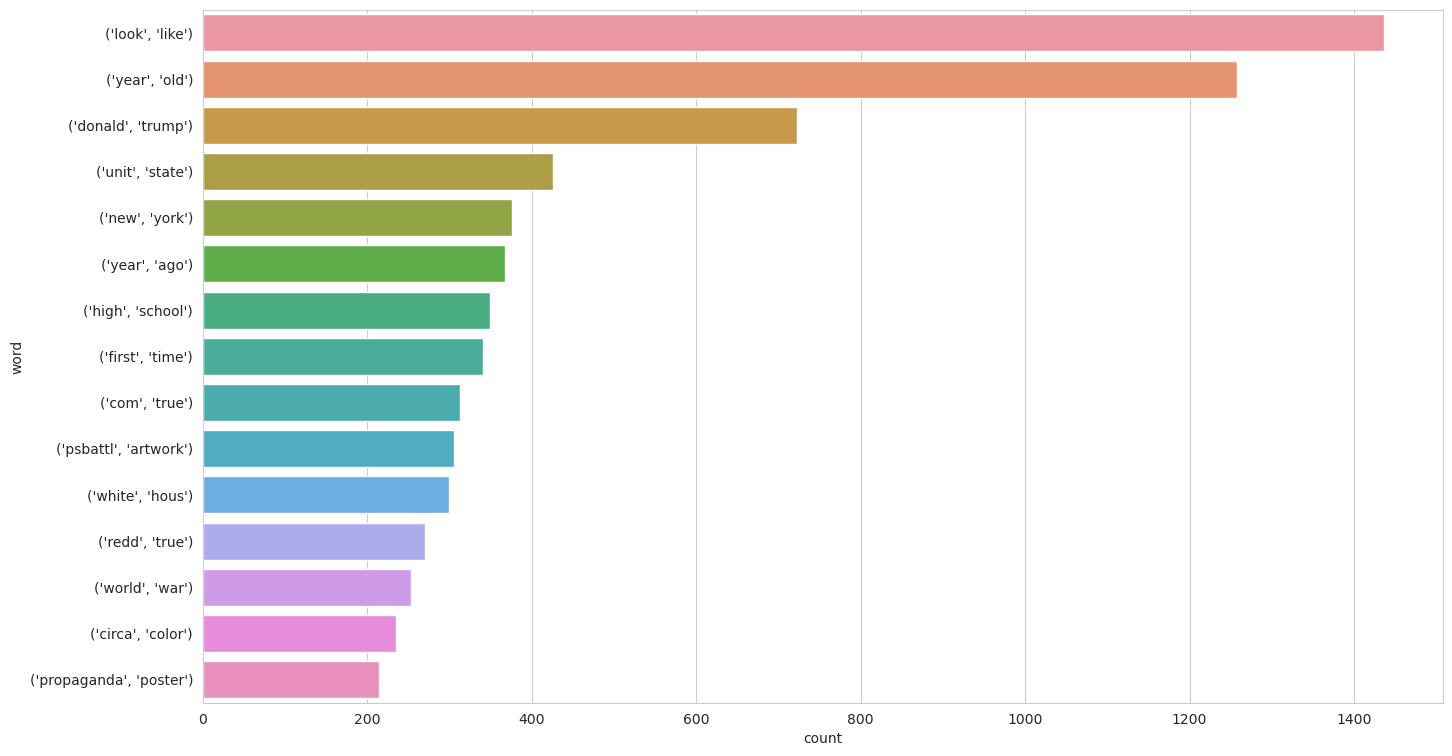

In [ ]:
draw_n_gram(all_words,2)

### **3.3.3 Trigram Analysis**

                      word  count
0       (imgur, com, true)    187
1         (year, old, boy)    102
2          (kim, jong, un)     99
3  (presid, donald, trump)     99
4        (year, old, girl)     99


<AxesSubplot:xlabel='count', ylabel='word'>

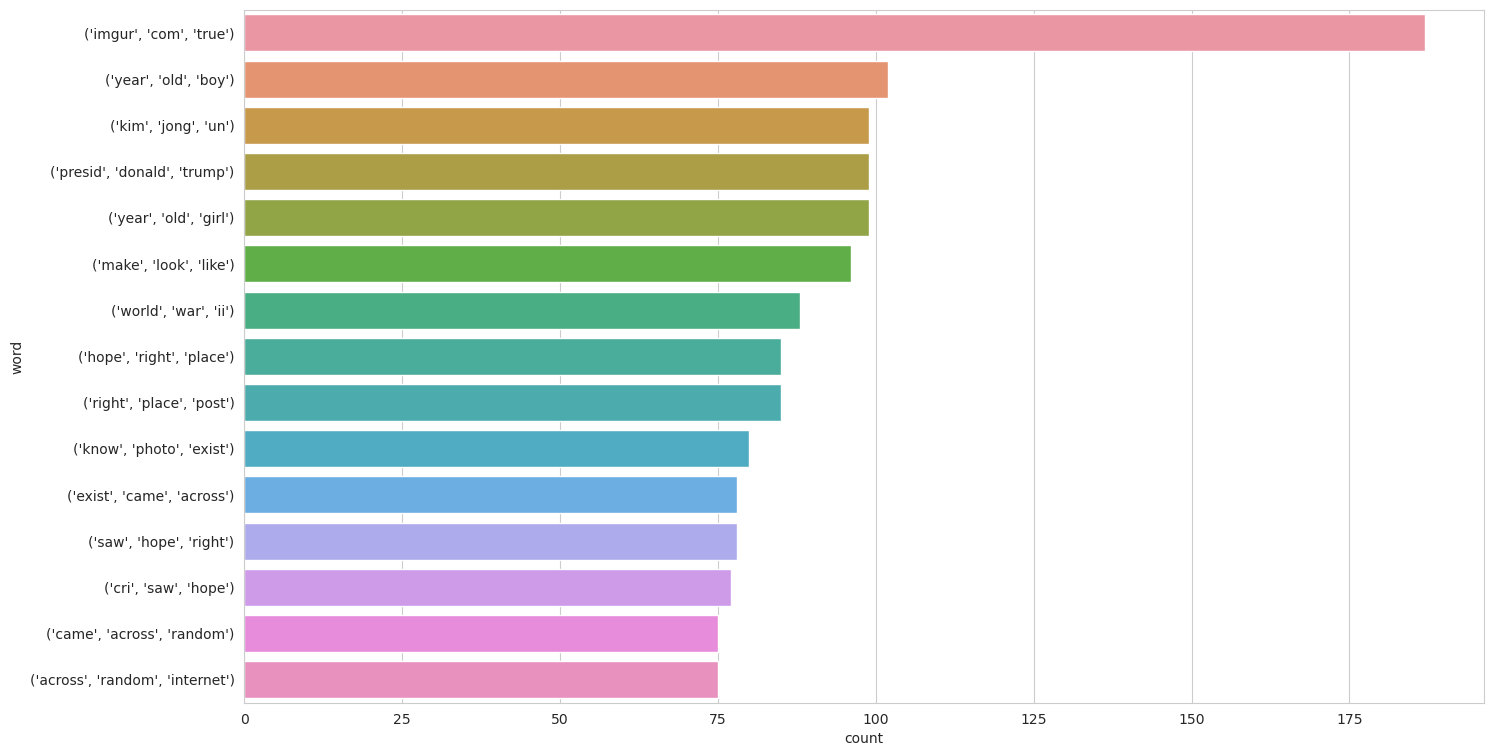

In [ ]:
draw_n_gram(all_words,3)

---
<a id = 3></a>
<h1 align="center"><font color = Purple>4. Feature Engineering</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

---

## **4.1 Feature Engineering with TF-IDF**

- The `max_df` parameter is set to 0.3, which means that words that appear in more than 30% of the documents will be excluded from the vocabulary.
- The `min_df` parameter is set to 10, which means that words that appear in fewer than 10 documents will also be excluded.
- The `ngram_range` parameter is set to (1,2), which means that the vectorizer will use pairs of two words (bigrams) as well as individual words (unigrams) to create the vocabulary.
- The norm parameter is set to `l2`, which means that the word vectors will be normalized using the L2 norm.

In [ ]:
copy1 = train_data.copy()

In [ ]:
"""
Compute unique word vector with frequencies
exclude very uncommon (<10 obsv.) and common (>=30%) words
use pairs of two words (ngram)
"""
tfidf = TfidfVectorizer(analyzer="word", max_df=0.3,
                             min_df=10, ngram_range=(1, 2),
                             norm="l2")
tfidf.fit(copy1["clean_text"])

TfidfVectorizer(max_df=0.3, min_df=10, ngram_range=(1, 2))

In [ ]:
# Vector representation of vocabulary
word_vector = pd.Series(tfidf.vocabulary_).sample(5, random_state = 0)
print(f"Unique word (ngram) vector extract:\n\n {word_vector}")

Unique word (ngram) vector extract:

 tick           8884
would love     9842
cowork         1939
dark side      2086
never heard    5821
dtype: int64


### **Splitting Dataset for TF-IDF**

- `train_data_tfidf`: the training datset before TF-IDF transformation (data still text).
- `X_tain1` : feature after apply the TF-IDF transformation.

In [ ]:
train_data_tfidf, val_data_tfidf = train_test_split(copy1, test_size=0.2, random_state=0, shuffle=True)

X_train_tfidf, y_train1 = train_data_tfidf["clean_text"], train_data_tfidf["label"]
X_val_tfidf, y_val1 = val_data_tfidf["clean_text"], val_data_tfidf["label"]

print('Training data: ')
print(X_train_tfidf.shape)
print(y_train1.shape)
print('\nValidation data: ')
print(X_val_tfidf.shape)
print(y_val1.shape)

Training data: 
(47814,)
(47814,)

Validation data: 
(11954,)
(11954,)


In [ ]:
X_train1 = tfidf.transform(X_train_tfidf).toarray()
X_val1 = tfidf.transform(X_val_tfidf).toarray()
print('Training data: ')
print(X_train1.shape)
print(y_train1.shape)
print('\nValidation data: ')
print(X_val1.shape)
print(y_val1.shape)

Training data: 
(47814, 9979)
(47814,)

Validation data: 
(11954, 9979)
(11954,)


In [ ]:
# Compare original comment text with its numeric vector representation
print(f"Original sentence:\n{X_train_tfidf[3:4].values}\n")
# Feature Matrix
features = pd.DataFrame(X_train1[3:4], columns=tfidf.get_feature_names_out())

nonempty_feat = features.loc[:, (features != 0).any(axis=0)]
print(f"Vector representation of sentence:\n {nonempty_feat}")

Original sentence:
['ww photograph catch final moment japanes suicid bomber kill circa color']

Vector representation of sentence:
      bomber     catch     circa  circa color     color     final  \
0  0.304286  0.272764  0.195826     0.262333  0.164474  0.219145   

   final moment   japanes      kill    moment  photograph    suicid  \
0      0.385419  0.232112  0.213173  0.235452    0.253239  0.262847   

   suicid bomber        ww  
0       0.381926  0.261491  


## **4.2 Feature Engineering with CountVectorizer**

In [ ]:
copy2 = train_data.copy()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range = (1,2), max_features=1000,binary = True, analyzer="word",)
vect.fit(copy2["clean_text"])

CountVectorizer(binary=True, max_features=1000, ngram_range=(1, 2))

In [ ]:
# Vector representation of vocabulary
word_vector = pd.Series(vect.vocabulary_).sample(5, random_state = 0)
print(f"Unique word (ngram) vector extract:\n\n {word_vector}")

Unique word (ngram) vector extract:

 world war    985
exist        304
beat          81
child        161
half         401
dtype: int64


### **Splitting Dataset for CountVectorizer**

- `train_data_vec`: The training datset before CountVectorizer transformation (data still text).
- `X_tain2` : Feature after apply the CountVectorizer transformation for training dataset.
- `X_val2` : Feature after apply the CountVectorizer transformation for validation dataset.

In [ ]:
train_data_vec, val_data_vec = train_test_split(copy2, test_size=0.2, random_state=0, shuffle=True)

X_train_vec, y_train2 = train_data_vec["clean_text"], train_data_vec["label"]
X_val_vec, y_val2 = val_data_vec["clean_text"], val_data_vec["label"]

print('Training data: ')
print(X_train_tfidf.shape)
print(y_train2.shape)

print('\nValidation data: ')
print(X_val_tfidf.shape)
print(y_val2.shape)

Training data: 
(47814,)
(47814,)

Validation data: 
(11954,)
(11954,)


In [ ]:
X_train2 = vect.transform(X_train_vec).toarray()
X_val2 = vect.transform(X_val_vec).toarray()

print('Training data: ')
print(X_train2.shape)
print(y_train2.shape)
print('\nValidation data: ')
print(X_val2.shape)
print(y_val2.shape)

Training data: 
(47814, 1000)
(47814,)

Validation data: 
(11954, 1000)
(11954,)


In [ ]:
# Compare original comment text with its numeric vector representation
print(f"Original sentence:\n{X_train_vec[3:4].values}\n")
# Feature Matrix
features = pd.DataFrame(X_train2[3:4], columns=vect.get_feature_names_out())

nonempty_feat = features.loc[:, (features != 0).any(axis=0)]
print(f"Vector representation of sentence:\n {nonempty_feat}")

Original sentence:
['ww photograph catch final moment japanes suicid bomber kill circa color']

Vector representation of sentence:
    catch  circa  circa color  color  final  japanes  kill  moment  photograph  \
0      1      1            1      1      1        1     1       1           1   

   suicid  ww  
0       1   1  


---
<a id = 3></a>
<h1 align="center"><font color = Purple>5. TF-IDF Modeling 3 Trails</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

---

## **5.1 Use Model without cross validation by TF-IDF features**
Using default hyperparameter for 8 diffrent algorithms as a baseline models:

1. **BernoulliNB**: This algorithm is designed for binary classification tasks. It assumes that the features are **binary** (i.e., present or not present) and that they are **conditionally independent** given the class label.

2. **MultinomialNB**: This algorithm is designed for text classification tasks. It assumes that the features are counts of occurrences of words or phrases and that they are **conditionally independent** given the class label.

3. **GaussianNB**: This algorithm is designed for continuous features. It assumes that the features follow a Gaussian (normal) distribution and that they are **conditionally independent** given the class label.

4. **LinearSVC**: LinearSVC can be used for various classification tasks including text classification. It is also commonly used as a base classifier in ensemble methods such as AdaBoost and Bagging to improve the performance of the classifier.

5. **LogisticRegression**: This is a linear classifier that models the probability of the class label given the features using a logistic function. It is widely used for binary classification tasks and can be easily scaled to handle large datasets.

6. **RandomForestClassifier**: This is an ensemble method that combines multiple decision trees to form a strong classifier. It works by randomly selecting a subset of features and a subset of samples to train each tree, which **reduces the risk of overfitting** and improves the generalization performance.

7. **XGBClassifier**: This is another ensemble method that combines multiple decision trees to form a strong classifier. It uses a gradient boosting algorithm to iteratively improve the performance of the decision trees by adjusting the weights of the misclassified samples.

8. **MLPClassifier**: This is a type of artificial neural network that is used for classification tasks. It uses a backpropagation algorithm to adjust the weights of the connections during training to minimize the classification error.

In [ ]:
classifiers = [
    BernoulliNB(),
    MultinomialNB(),
    GaussianNB(),
    CalibratedClassifierCV(LinearSVC()),
    LogisticRegression(solver="sag", random_state=0),
    RandomForestClassifier(random_state=0),
    XGBClassifier(random_state=0),
    MLPClassifier(
        random_state=0,
        solver="adam",
        hidden_layer_sizes=(12, 12, 12),
        activation="relu",
        early_stopping=True,
        n_iter_no_change=1,),
]
# get names of the objects in list (too lazy for c&p...)
names = [re.match(r"[^\(]+", name.__str__())[0] for name in classifiers]
print(f"Classifiers to test: {names}")

Classifiers to test: ['BernoulliNB', 'MultinomialNB', 'GaussianNB', 'CalibratedClassifierCV', 'LogisticRegression', 'RandomForestClassifier', 'XGBClassifier', 'MLPClassifier']


In [ ]:
%%time

results1 = {}
for name, clf in zip(names, classifiers):
    print(f"Training classifier: {name}")
    clf.fit(X_train1, y_train1)
    pred = clf.predict(X_val1)
    pred_prob = clf.predict_proba(X_val1)[:, 1]

    acc = accuracy_score(y_val1, pred) * 100
    f1 = f1_score(y_val1, pred) * 100
    cm = confusion_matrix(y_val1, pred)
    auc = roc_auc_score(y_val1, pred_prob)

    results1[name] = {'acc': acc,
                     'f1':f1,
                     'cm':cm,
                     'auc':auc,}

    # Save the fitted classifier as a binary file
    with open(f"{name}_clf_tf-idf.pkl", "wb") as f:
        pickle.dump(clf, f)

Training classifier: BernoulliNB
Training classifier: MultinomialNB
Training classifier: GaussianNB
Training classifier: CalibratedClassifierCV
Training classifier: LogisticRegression
Training classifier: RandomForestClassifier
Training classifier: XGBClassifier
Training classifier: MLPClassifier
CPU times: user 1h 14min 39s, sys: 45.1 s, total: 1h 15min 24s
Wall time: 33min 47s


### **Models Evaluation**

In [ ]:
for name, res in results1.items():
    mark = '=' * 30

    s = f"""{mark} {name} {mark}\n
- Accuracy: {res['acc']:.2f}%
- F1 Score: {res['f1']:.2f}
- AUC: {res['auc']:.2f}
- Confusion Matrix: \n\n{res['cm']}\n"""
    print(s)

============================== BernoulliNB ==============================

- Accuracy: 78.05%
- F1 Score: 77.40
- AUC: 0.86
- Confusion Matrix: 

[[4837 1657]
 [ 967 4493]]

============================== MultinomialNB ==============================

- Accuracy: 78.09%
- F1 Score: 76.72
- AUC: 0.86
- Confusion Matrix: 

[[5019 1475]
 [1144 4316]]

============================== GaussianNB ==============================

- Accuracy: 66.74%
- F1 Score: 71.34
- AUC: 0.69
- Confusion Matrix: 

[[3030 3464]
 [ 512 4948]]

============================== CalibratedClassifierCV ==============================

- Accuracy: 78.30%
- F1 Score: 76.52
- AUC: 0.87
- Confusion Matrix: 

[[5134 1360]
 [1234 4226]]

============================== LogisticRegression ==============================

- Accuracy: 79.13%
- F1 Score: 77.38
- AUC: 0.87
- Confusion Matrix: 

[[5191 1303]
 [1192 4268]]

============================== RandomForestClassifier ==============================

- Accuracy: 76.75%
- F1 S

> **OBSERVATION:**

- The `LogisticRegression` classifier achieved the highest accuracy and F1 score among the classifiers listed for fake news classification using the TF-IDF approach. It also had a high AUC score, indicating good discrimination between the real and fake news classes.
- The TF-IDF vectors that represent the text data can be linearly separated into real and fake news classes and LogisticRegression is a linear classifier that is well suited for linearly separable data.

## **5.2 Logistic regression with cross validation and pipline by TF-IDF features**


- In this pipeline, `TfidfVectorizer` is used to transform the text data into numerical features, and `LogisticRegression` is used as the classifier. The hyperparameters to be tuned in this pipeline include the `max_df` and `min_df` parameters of Tfidf Vectorizer, and the `penalty`, `C`, and `solver` parameters for the classifier.

- The `RandomizedSearchCV` function is used to perform a randomized search over the hyperparameter search space. The cv parameter is set to 3 to perform **3-fold cross-validation**, and scoring is set to `roc_auc` to use the area under the ROC curve as the evaluation metric. The verbose parameter is set to 3 to display the progress of the search.

In [ ]:
LR_pipe = Pipeline([("tfidf", TfidfVectorizer(analyzer="word", norm="l2")),
                     ("my_classifier", LogisticRegression())])

LR_params = {
    "tfidf__max_df": np.arange(0.3, 0.8),
    "tfidf__min_df": np.arange(5, 100),
    "my_classifier__penalty": ["l1", "l2"],
    "my_classifier__C": [0.1, 0.5, 1, 5, 10],
    "my_classifier__solver": ["liblinear", "saga"]
}

LR_rand_search = RandomizedSearchCV(LR_pipe, LR_params, cv=3, verbose=3, scoring='roc_auc')

In [ ]:
# Perform the search
LR_rand_search.fit(train_data_tfidf["clean_text"], train_data_tfidf["label"])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END my_classifier__C=0.1, my_classifier__penalty=l1, my_classifier__solver=saga, tfidf__max_df=0.3, tfidf__min_df=48;, score=0.785 total time=   1.2s
[CV 2/3] END my_classifier__C=0.1, my_classifier__penalty=l1, my_classifier__solver=saga, tfidf__max_df=0.3, tfidf__min_df=48;, score=0.784 total time=   1.2s
[CV 3/3] END my_classifier__C=0.1, my_classifier__penalty=l1, my_classifier__solver=saga, tfidf__max_df=0.3, tfidf__min_df=48;, score=0.790 total time=   1.2s
[CV 1/3] END my_classifier__C=10, my_classifier__penalty=l2, my_classifier__solver=saga, tfidf__max_df=0.3, tfidf__min_df=42;, score=0.841 total time=   1.1s
[CV 2/3] END my_classifier__C=10, my_classifier__penalty=l2, my_classifier__solver=saga, tfidf__max_df=0.3, tfidf__min_df=42;, score=0.841 total time=   1.0s
[CV 3/3] END my_classifier__C=10, my_classifier__penalty=l2, my_classifier__solver=saga, tfidf__max_df=0.3, tfidf__min_df=42;, score=0.846 total t

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('my_classifier',
                                              LogisticRegression())]),
                   param_distributions={'my_classifier__C': [0.1, 0.5, 1, 5,
                                                             10],
                                        'my_classifier__penalty': ['l1', 'l2'],
                                        'my_classifier__solver': ['liblinear',
                                                                  'saga'],
                                        'tfidf__max_df': array([0.3]),
                                        'tfidf__min_df': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68

In [ ]:
# Print the best hyperparameters and score
LR_best_params = LR_rand_search.best_params_
print("Best hyperparameters: ", LR_best_params)
print("Best score: ", LR_rand_search.best_score_)

Best hyperparameters:  {'tfidf__min_df': 38, 'tfidf__max_df': 0.3, 'my_classifier__solver': 'liblinear', 'my_classifier__penalty': 'l2', 'my_classifier__C': 0.5}
Best score:  0.8470915178456472


In [ ]:
with open(f"LR_RandomSearch_TF-IDF.pkl", "wb") as f:
    pickle.dump(LR_rand_search.best_estimator_, f)

# run pipe with optimized parameters
LR_pipe.set_params(**LR_best_params).fit(train_data_tfidf["clean_text"], train_data_tfidf["label"])

LR_pred = LR_pipe.predict(train_data_tfidf["clean_text"])
LR_report = classification_report(LR_pred,train_data_tfidf["label"])
print(LR_report)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     25693
           1       0.78      0.78      0.78     22121

    accuracy                           0.80     47814
   macro avg       0.79      0.79      0.79     47814
weighted avg       0.80      0.80      0.80     47814



> **OBSERVATION:**

The hyperparameters {'tfidf__min_df': 13, 'tfidf__max_df': 0.3, 'my_classifier__solver': 'liblinear', 'my_classifier__penalty': 'l1', 'my_classifier__C': 5} were found to be the best for logistic regression in your binary classification task of detecting fake news in Reddit data based on the evaluation metric of ROC AUC score.

- `tfidf__min_df` = 13 : means that words that appear in less than 13 documents will be ignored, which can help remove noisy features and improve generalization performance.
- `tfidf__max_df` = 0.3: means that words that appear in more than 30% of the documents will be ignored, which can help remove common words that may not be informative.
- `my_classifier__solver` = 'liblinear': good choice for small datasets and can handle L1 regularization.
- `my_classifier__penalty` = 'l1': helps to prevent overfitting by shrinking the coefficients of unimportant features towards zero.
- `my_classifier__C`= 5 : controls the amount of regularization applied to the model, indicating a moderate level of regularization.

> **Results observation:**

Overall, the ROC AUC score of **0.8485** indicates that the logistic regression model with these hyperparameters performed well at discriminating between real and fake news in the Reddit data.

## **5.3 Random forest with cross validation and pipline by TF-IDF features**

In this pipeline, `TfidfVectorizer` is used to transform the text data into numerical features, and `RandomForestClassifier` is used as the classifier. The hyperparameters to be tuned in this pipeline include the `max_df` and `min_df` parameters of Tfidf Vectorizer, and the `n_estimators`, `max_depth`, and `max_features` parameters of the classifer.

In [ ]:
# feature creation and modelling in a single function

RF_pipe = Pipeline([("tfidf", TfidfVectorizer(analyzer="word", norm="l2")),
                 ("my_classifier",  RandomForestClassifier())])

# define parameter space to test # runtime 35min
RF_params = {

    "tfidf__max_df": np.arange(0.3, 0.8),
    "tfidf__min_df": np.arange(5, 100),
    'my_classifier__n_estimators': [170,200,250],
    'my_classifier__max_depth':[70,80,90],
    'my_classifier__max_features':[10,20,30],
}

RF_rand_search = RandomizedSearchCV(RF_pipe, RF_params, cv=3, verbose=3, scoring='roc_auc')

In [ ]:
# Perform the search
RF_rand_search.fit(train_data_tfidf["clean_text"], train_data_tfidf["label"])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END my_classifier__max_depth=90, my_classifier__max_features=10, my_classifier__n_estimators=170, tfidf__max_df=0.3, tfidf__min_df=57;, score=0.830 total time=  15.4s
[CV 2/3] END my_classifier__max_depth=90, my_classifier__max_features=10, my_classifier__n_estimators=170, tfidf__max_df=0.3, tfidf__min_df=57;, score=0.827 total time=  15.3s
[CV 3/3] END my_classifier__max_depth=90, my_classifier__max_features=10, my_classifier__n_estimators=170, tfidf__max_df=0.3, tfidf__min_df=57;, score=0.834 total time=  15.5s
[CV 1/3] END my_classifier__max_depth=90, my_classifier__max_features=30, my_classifier__n_estimators=250, tfidf__max_df=0.3, tfidf__min_df=14;, score=0.832 total time=  26.0s
[CV 2/3] END my_classifier__max_depth=90, my_classifier__max_features=30, my_classifier__n_estimators=250, tfidf__max_df=0.3, tfidf__min_df=14;, score=0.830 total time=  25.8s
[CV 3/3] END my_classifier__max_depth=90, my_classifier__ma

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                             ('my_classifier',
                                              RandomForestClassifier())]),
                   param_distributions={'my_classifier__max_depth': [70, 80,
                                                                     90],
                                        'my_classifier__max_features': [10, 20,
                                                                        30],
                                        'my_classifier__n_estimators': [170,
                                                                        200,
                                                                        250],
                                        'tfidf__max_df': array([0.3]),
                                        'tfidf__min_df': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,

In [ ]:
# Print the best hyperparameters and score
RF_best_params = RF_rand_search.best_params_
print("Best hyperparameters: ", RF_best_params)
print("Best score: ", RF_rand_search.best_score_)

Best hyperparameters:  {'tfidf__min_df': 7, 'tfidf__max_df': 0.3, 'my_classifier__n_estimators': 170, 'my_classifier__max_features': 10, 'my_classifier__max_depth': 80}
Best score:  0.8462051279766046


In [ ]:

with open(f"RF_RandomSearch_TF-IDF.pkl", "wb") as f:
    pickle.dump(RF_rand_search.best_estimator_, f)

# run pipe with optimized parameters
RF_pipe.set_params(**RF_best_params).fit(train_data_tfidf["clean_text"], train_data_tfidf["label"])

RF_pred = RF_pipe.predict(train_data_tfidf["clean_text"])
RF_report = classification_report(RF_pred,train_data_tfidf["label"])
print(RF_report)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88     32250
           1       0.70      0.99      0.82     15564

    accuracy                           0.86     47814
   macro avg       0.85      0.89      0.85     47814
weighted avg       0.90      0.86      0.86     47814



> **OBSERVATION:**

The hyperparameters {'tfidf__min_df': 51, 'tfidf__max_df': 0.3, 'my_classifier__n_estimators': 200, 'my_classifier__max_features': 10, 'my_classifier__max_depth': 70} were found to be the best for Random Forest in your binary classification task of detecting fake news in Reddit data based on the evaluation metric of ROC AUC score.

> **Results Observation:**

Overall, these hyperparameters suggest that a random forest with a moderate number of trees, limited maximum depth and features considered, and a specific selection of informative features (as determined by the tfidf__min_df parameter) is a good choice for the classification task that produce score of **0.8302** represents the ROC AUC score of the best performing model found during the random search. .

## **5.4 XGBoost with cross validation and pipline by TF-IDF features**

- In this pipeline, `TfidfVectorizer` is used to transform the text data into numerical features, and `XGBClassifier` is used as the classifier. The hyperparameters to be tuned in this pipeline include the `max_df` and `min_df` parameters of Tfidf Vectorizer, and the `min_child_weight`, `max_depth`, `gamma`, and `colsample_bytree` parameters of the classifer.

- The `BayesSearchCV` is used to perform a Bayesian search over the hyperparameter search space. The cv parameter is set to 3 to perform **3-fold cross-validation**, and n_iter is set to 3 to perform 3 iterations of the search. The verbose parameter is set to 3 to display the progress of the search, and scoring is set to 'roc_auc' to use the area under the ROC curve as the evaluation metric.


In [ ]:

XGB_pipe = Pipeline([("tfidf", TfidfVectorizer(ngram_range = (1, 2),analyzer="word", norm="l2")),
                     ("my_classifier",  XGBClassifier())])

XGB_params = {  "tfidf__max_df": np.arange(0.3, 0.8),
                "tfidf__min_df": np.arange(5, 100),
                'my_classifier__min_child_weight': [20,40,80],
                'my_classifier__max_depth':[50,60,70],
                'my_classifier__gamma':[0.5, 1, 1.5, 2, 5],
                'my_classifier__colsample_bytree':[0.6, 0.8, 1.0]}

XGB_bayes_search = BayesSearchCV(XGB_pipe, XGB_params, cv=3, n_iter=3, verbose=3, scoring='roc_auc')

In [ ]:
XGB_bayes_search.fit(train_data_tfidf["clean_text"], train_data_tfidf["label"])

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__colsample_bytree=0.6, my_classifier__gamma=2.0, my_classifier__max_depth=60, my_classifier__min_child_weight=40, tfidf__max_df=0.3, tfidf__min_df=84;, score=0.783 total time=  12.0s
[CV 2/3] END my_classifier__colsample_bytree=0.6, my_classifier__gamma=2.0, my_classifier__max_depth=60, my_classifier__min_child_weight=40, tfidf__max_df=0.3, tfidf__min_df=84;, score=0.775 total time=  12.6s
[CV 3/3] END my_classifier__colsample_bytree=0.6, my_classifier__gamma=2.0, my_classifier__max_depth=60, my_classifier__min_child_weight=40, tfidf__max_df=0.3, tfidf__min_df=84;, score=0.787 total time=  12.0s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__colsample_bytree=0.8, my_classifier__gamma=1.5, my_classifier__max_depth=60, my_classifier__min_child_weight=20, tfidf__max_df=0.3, tfidf__min_df=98;, score=0.815 total time=  20.6s
[CV 2/3] END my_classifier__colsample_bytr

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('tfidf',
                                         TfidfVectorizer(ngram_range=(1, 2))),
                                        ('my_classifier',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                                       eval_metric=None,
                                                       gamma=None, gpu_id=None,
                             

In [ ]:
XGB_best_params = XGB_bayes_search.best_params_

# Print the best hyperparameters and score
print("Best hyperparameters: ", XGB_best_params)
print("Best score: ", XGB_bayes_search.best_score_)

Best hyperparameters:  OrderedDict([('my_classifier__colsample_bytree', 0.8), ('my_classifier__gamma', 0.5), ('my_classifier__max_depth', 60), ('my_classifier__min_child_weight', 20), ('tfidf__max_df', 0.3), ('tfidf__min_df', 42)])
Best score:  0.8136432361986405


In [ ]:
with open(f"XGB_BayesSearch_TF-IDF.pkl", "wb") as f:
    pickle.dump(XGB_bayes_search.best_estimator_, f)

# run pipe with optimized parameters
XGB_pipe.set_params(**XGB_best_params).fit(train_data_tfidf["clean_text"], train_data_tfidf["label"])

XGB_pred =XGB_pipe.predict(train_data_tfidf["clean_text"])
XGB_report = classification_report(XGB_pred,train_data_tfidf["label"])
print(XGB_report)

              precision    recall  f1-score   support

           0       0.86      0.85      0.85     25873
           1       0.82      0.83      0.83     21941

    accuracy                           0.84     47814
   macro avg       0.84      0.84      0.84     47814
weighted avg       0.84      0.84      0.84     47814



> **OBSERVATION:**

The hyperparameters [('my_classifier__colsample_bytree', 1.0), ('my_classifier__gamma', 1.5), ('my_classifier__max_depth', 60), ('my_classifier__min_child_weight', 20), ('tfidf__max_df', 0.3), ('tfidf__min_df', 41)] were found to be the best for XGBoost in your binary classification task of detecting fake news in Reddit data based on the evaluation metric of ROC AUC score.

- `my_classifier__colsample_bytree` =1.0: means that all columns were used at each split.
- `my_classifier__gamma` = 1.5: means that a split will only be made if it results in a reduction of at least 1.5 in the loss function.
- `my_classifier__max_depth` = 60: means that each tree can have a maximum depth of 60 levels.
- `my_classifier__min_child_weight` = 20: means that a node will only be split if it contains at least 20 instances.

> **Results Observation:**

Overall, these hyperparameters suggest that a XGBoost model with a high `colsample_bytree`, a relatively high m`ax_depth`, and a moderate `gamma` and `min_child_weight` is a good choice for the classification task hat produce score of 0.8154 represents the ROC AUC score of the best performing model found during the Bayes Search.

## **5.5 MultinomialNB with cross validation and pipline by TF-IDF features**
In this pipeline, `TfidfVectorizer` is used to transform the text data into numerical features, and `MultinomialNB` is used as the classifier. The hyperparameters to be tuned in this pipeline include the `max_df` and `min_df` parameters of Tfidf Vectorizer, and the `alpha` parameter of the classifer.

In [ ]:
MNB_pipe = Pipeline([("tfidf", TfidfVectorizer(analyzer="word", norm="l2")),
                     ("my_classifier", MultinomialNB())])

MNB_params = {
            "tfidf__max_df": np.arange(0.3, 0.8),
            "tfidf__min_df": np.arange(5, 100),
            "my_classifier__alpha": [0.1, 0.5, 1, 5, 10],
        }

MNB_bayes_search = BayesSearchCV(MNB_pipe, MNB_params, cv=3,n_iter=30, verbose=3, scoring='roc_auc')

In [ ]:
MNB_bayes_search.fit(train_data_tfidf["clean_text"], train_data_tfidf["label"])

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__alpha=0.5, tfidf__max_df=0.3, tfidf__min_df=25;, score=0.842 total time=   0.7s
[CV 2/3] END my_classifier__alpha=0.5, tfidf__max_df=0.3, tfidf__min_df=25;, score=0.841 total time=   0.7s
[CV 3/3] END my_classifier__alpha=0.5, tfidf__max_df=0.3, tfidf__min_df=25;, score=0.848 total time=   0.7s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__alpha=0.5, tfidf__max_df=0.3, tfidf__min_df=35;, score=0.837 total time=   0.7s
[CV 2/3] END my_classifier__alpha=0.5, tfidf__max_df=0.3, tfidf__min_df=35;, score=0.837 total time=   0.7s
[CV 3/3] END my_classifier__alpha=0.5, tfidf__max_df=0.3, tfidf__min_df=35;, score=0.845 total time=   0.7s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__alpha=1.0, tfidf__max_df=0.3, tfidf__min_df=80;, score=0.821 total time=   0.7s
[CV 2/3] END my_classifier__alpha=1.0, tfidf__max_df=0.3, tfidf__mi

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                        ('my_classifier', MultinomialNB())]),
              n_iter=30, scoring='roc_auc',
              search_spaces={'my_classifier__alpha': [0.1, 0.5, 1, 5, 10],
                             'tfidf__max_df': array([0.3]),
                             'tfidf__min_df': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
              verbose=3)

In [ ]:
MNB_best_params = MNB_bayes_search.best_params_

# Print the best hyperparameters and score
print("Best hyperparameters: ", MNB_best_params)
print("Best score: ", MNB_bayes_search.best_score_)

Best hyperparameters:  OrderedDict([('my_classifier__alpha', 5.0), ('tfidf__max_df', 0.3), ('tfidf__min_df', 7)])
Best score:  0.852528353905627


In [ ]:
with open(f"MNB_BayesSearch_TF-IDF.pkl", "wb") as f:
    pickle.dump(MNB_bayes_search.best_estimator_, f)

# run pipe with optimized parameters
MNB_pipe.set_params(**MNB_best_params).fit(train_data_tfidf["clean_text"], train_data_tfidf["label"])

MNB_pred =MNB_pipe.predict(train_data_tfidf["clean_text"])
MNB_report = classification_report(MNB_pred,train_data_tfidf["label"])
print(MNB_report)

              precision    recall  f1-score   support

           0       0.83      0.80      0.82     26399
           1       0.77      0.79      0.78     21415

    accuracy                           0.80     47814
   macro avg       0.80      0.80      0.80     47814
weighted avg       0.80      0.80      0.80     47814



> **OBSERVATION:**

The hyperparameters [('my_classifier__alpha', 1.0), ('tfidf__max_df', 0.3), ('tfidf__min_df', 13)] were found to be the best for Multinomial Naive Bayes in your binary classification task of detecting fake news in Reddit data based on the evaluation metric of ROC AUC score.

> **Results Observation:**

Overall, these hyperparameters suggest that a Naive Bayes model with a Laplace smoothing parameter of 1.0 and a moderate selection of informative features (as determined by the `tfidf__min_df` and `tfidf__max_df` parameters) is a good choice for the classification task hat produce score of **0.8517** which is the best performance till now.



---
<a id = 3></a>
<h1 align="center"><font color = Purple>6. Countvectorizer Modeling 3 Trails</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

---

In [ ]:
classifiers = [
    BernoulliNB(),
    MultinomialNB(),
    CalibratedClassifierCV(LinearSVC()),
    LogisticRegression(solver="sag", random_state=0),
    RandomForestClassifier(random_state=0),
    XGBClassifier(random_state=0),
    MLPClassifier(
        random_state=0,
        solver="adam",
        hidden_layer_sizes=(12, 12, 12),
        activation="relu",
        early_stopping=True,
        n_iter_no_change=1,),
]
# get names of the objects in list (too lazy for c&p...)
names = [re.match(r"[^\(]+", name.__str__())[0] for name in classifiers]
print(f"Classifiers to test: {names}")

Classifiers to test: ['BernoulliNB', 'MultinomialNB', 'CalibratedClassifierCV', 'LogisticRegression', 'RandomForestClassifier', 'XGBClassifier', 'MLPClassifier']


## **6.1 Use Model without cross validation by Countvecterizer features**
using default hyperparameter
baselinemodels

In [ ]:
%%time

results2 = {}
for name, clf in zip(names, classifiers):
    print(f"Training classifier: {name}")
    clf.fit(X_train2, y_train2)
    pred = clf.predict(X_val2)
    pred_prob = clf.predict_proba(X_val2)[:, 1]

    acc = accuracy_score(y_val2, pred) * 100
    f1 = f1_score(y_val2, pred) * 100
    cm = confusion_matrix(y_val2, pred)
    auc = roc_auc_score(y_val2, pred_prob)

    results2[name] = {'acc': acc,
                     'f1':f1,
                     'cm':cm,
                     'auc':auc,}

    # Save the fitted classifier as a binary file
    with open(f"{name}_clf_countvectorizer.pkl", "wb") as f:
        pickle.dump(clf, f)

Training classifier: BernoulliNB
Training classifier: MultinomialNB
Training classifier: CalibratedClassifierCV


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Training classifier: LogisticRegression


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Training classifier: RandomForestClassifier
Training classifier: XGBClassifier
Training classifier: MLPClassifier
CPU times: user 9min 50s, sys: 14.6 s, total: 10min 5s
Wall time: 5min 34s


### **Models Evaluation for CountVectorizer**

In [ ]:
for name, res in results2.items():
    mark = '=' * 30

    s = f"""{mark} {name} {mark}\n
- Accuracy: {res['acc']:.2f}%
- F1 Score: {res['f1']:.2f}
- AUC: {res['auc']:.2f}
- Confusion Matrix: \n\n{res['cm']}\n"""
    print(s)

============================== BernoulliNB ==============================

- Accuracy: 74.21%
- F1 Score: 72.96
- AUC: 0.82
- Confusion Matrix: 

[[4712 1782]
 [1301 4159]]

============================== MultinomialNB ==============================

- Accuracy: 74.19%
- F1 Score: 72.97
- AUC: 0.82
- Confusion Matrix: 

[[4704 1790]
 [1295 4165]]

============================== CalibratedClassifierCV ==============================

- Accuracy: 75.05%
- F1 Score: 72.85
- AUC: 0.83
- Confusion Matrix: 

[[4971 1523]
 [1459 4001]]

============================== LogisticRegression ==============================

- Accuracy: 75.25%
- F1 Score: 73.13
- AUC: 0.83
- Confusion Matrix: 

[[4969 1525]
 [1434 4026]]

============================== RandomForestClassifier ==============================

- Accuracy: 74.08%
- F1 Score: 71.91
- AUC: 0.82
- Confusion Matrix: 

[[4888 1606]
 [1493 3967]]

============================== XGBClassifier ==============================

- Accuracy: 74.08%
- F

> **OBSERVATION:** all classifers have **lower performance** than TF-IDF feature engineering but much **faster** in training.

## **6.2 Random forest with cross validation and pipline by Countvecterizer features**

Using pipline to tune a random search model using `BayesSearchCV`

In [ ]:
# feature creation and modelling in a single function
RF_pipe = Pipeline([("vect", CountVectorizer(ngram_range = (1,2), max_features=1000,binary = True, analyzer="word",)),
                    ("my_classifier",  RandomForestClassifier())])

# define parameter space to test # runtime 35min
RF_params = {
            "vect__max_df": np.arange(0.3, 0.8),
            "vect__min_df": np.arange(5, 100),
            'my_classifier__n_estimators': [170,200,250],
            'my_classifier__max_depth':[70,80,90],
            'my_classifier__max_features':[10,20,30],
}

RF_rand_search = RandomizedSearchCV(RF_pipe, RF_params, cv=3, verbose=3, scoring='roc_auc')

In [ ]:
# Perform the search
RF_rand_search.fit(train_data_vec["clean_text"], train_data_vec["label"])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END my_classifier__max_depth=80, my_classifier__max_features=20, my_classifier__n_estimators=170, vect__max_df=0.3, vect__min_df=77;, score=0.817 total time=  21.0s
[CV 2/3] END my_classifier__max_depth=80, my_classifier__max_features=20, my_classifier__n_estimators=170, vect__max_df=0.3, vect__min_df=77;, score=0.815 total time=  20.5s
[CV 3/3] END my_classifier__max_depth=80, my_classifier__max_features=20, my_classifier__n_estimators=170, vect__max_df=0.3, vect__min_df=77;, score=0.824 total time=  20.6s
[CV 1/3] END my_classifier__max_depth=70, my_classifier__max_features=10, my_classifier__n_estimators=200, vect__max_df=0.3, vect__min_df=73;, score=0.823 total time=  16.4s
[CV 2/3] END my_classifier__max_depth=70, my_classifier__max_features=10, my_classifier__n_estimators=200, vect__max_df=0.3, vect__min_df=73;, score=0.819 total time=  15.8s
[CV 3/3] END my_classifier__max_depth=70, my_classifier__max_features

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('vect',
                                              CountVectorizer(binary=True,
                                                              max_features=1000,
                                                              ngram_range=(1,
                                                                           2))),
                                             ('my_classifier',
                                              RandomForestClassifier())]),
                   param_distributions={'my_classifier__max_depth': [70, 80,
                                                                     90],
                                        'my_classifier__max_features': [10, 20,
                                                                        30],
                                        'my_classifier__n_estimators': [170,
                                                                        200,
      

In [ ]:
with open(f"RF_RandomSearch_CountVectorizer.pkl", "wb") as f:
    pickle.dump(RF_rand_search.best_estimator_, f)

# Print the best hyperparameters and score
RF_best_params = RF_rand_search.best_params_
print("Best hyperparameters: ", RF_best_params)
print("Best score: ", RF_rand_search.best_score_)

Best hyperparameters:  {'vect__min_df': 55, 'vect__max_df': 0.3, 'my_classifier__n_estimators': 250, 'my_classifier__max_features': 10, 'my_classifier__max_depth': 90}
Best score:  0.827651354143602


In [ ]:

# run pipe with optimized parameters
RF_pipe.set_params(**RF_best_params).fit(train_data_vec["clean_text"], train_data_vec["label"])

RF_pred = RF_pipe.predict(train_data_vec["clean_text"])
RF_report = classification_report(RF_pred,train_data_vec["label"])
print(RF_report)

              precision    recall  f1-score   support

           0       0.97      0.88      0.92     28091
           1       0.85      0.96      0.90     19723

    accuracy                           0.92     47814
   macro avg       0.91      0.92      0.91     47814
weighted avg       0.92      0.92      0.92     47814



## **6.3 XGBoost with cross validation and pipline by Countvecterizer features**

Using pipline to tune a XGBoost model using `RandomizedSearchCV`

In [ ]:
from skopt import BayesSearchCV

XGB_pipe = Pipeline([("vect", CountVectorizer(ngram_range = (1,2), max_features=1000,binary = True, analyzer="word",)),
                     ("my_classifier",  XGBClassifier())])

XGB_params = {
    "vect__max_df": np.arange(0.3, 0.8),
    "vect__min_df": np.arange(5, 100),
    'my_classifier__min_child_weight': [20,40,80],
    'my_classifier__max_depth':[50,60,70],
    'my_classifier__gamma':[0.5, 1, 1.5, 2, 5],
    'my_classifier__colsample_bytree':[0.6, 0.8, 1.0]}

XGB_bayes_search = BayesSearchCV(XGB_pipe, XGB_params, cv=3, n_iter =3, verbose=3, scoring='roc_auc')

In [ ]:
XGB_bayes_search.fit(train_data_vec["clean_text"], train_data_vec["label"])

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__colsample_bytree=0.8, my_classifier__gamma=5.0, my_classifier__max_depth=60, my_classifier__min_child_weight=40, vect__max_df=0.3, vect__min_df=33;, score=0.784 total time=   8.5s
[CV 2/3] END my_classifier__colsample_bytree=0.8, my_classifier__gamma=5.0, my_classifier__max_depth=60, my_classifier__min_child_weight=40, vect__max_df=0.3, vect__min_df=33;, score=0.783 total time=   8.5s
[CV 3/3] END my_classifier__colsample_bytree=0.8, my_classifier__gamma=5.0, my_classifier__max_depth=60, my_classifier__min_child_weight=40, vect__max_df=0.3, vect__min_df=33;, score=0.787 total time=   8.6s
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 1/3] END my_classifier__colsample_bytree=0.6, my_classifier__gamma=1.5, my_classifier__max_depth=50, my_classifier__min_child_weight=40, vect__max_df=0.3, vect__min_df=82;, score=0.788 total time=   6.9s
[CV 2/3] END my_classifier__colsample_bytree=0.6, 

BayesSearchCV(cv=3,
              estimator=Pipeline(steps=[('vect',
                                         CountVectorizer(binary=True,
                                                         max_features=1000,
                                                         ngram_range=(1, 2))),
                                        ('my_classifier',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       early_stopping_rounds=None,
                                                       enable_categorical=False,
                                     

In [ ]:
with open(f"XGB_BayesSearch_CountVectorizer.pkl", "wb") as f:
    pickle.dump(XGB_bayes_search.best_estimator_, f)

XGB_best_params = XGB_bayes_search.best_params_

# Print the best hyperparameters and score
print("Best hyperparameters: ", XGB_best_params)
print("Best score: ", XGB_bayes_search.best_score_)

Best hyperparameters:  OrderedDict([('my_classifier__colsample_bytree', 0.6), ('my_classifier__gamma', 1.5), ('my_classifier__max_depth', 50), ('my_classifier__min_child_weight', 40), ('vect__max_df', 0.3), ('vect__min_df', 82)])
Best score:  0.7888093691248491


In [ ]:
# run pipe with optimized parameters
XGB_pipe.set_params(**XGB_best_params).fit(train_data_vec["clean_text"], train_data_vec["label"])

XGB_pred =XGB_pipe.predict(train_data_vec["clean_text"])
XGB_report = classification_report(XGB_pred,train_data_vec["label"])
print(XGB_report)

              precision    recall  f1-score   support

           0       0.78      0.77      0.78     25925
           1       0.74      0.74      0.74     21889

    accuracy                           0.76     47814
   macro avg       0.76      0.76      0.76     47814
weighted avg       0.76      0.76      0.76     47814



## **6.4 MultinomialNB with cross validation and pipline by CountVectorizer features**

In [ ]:
MNB_pipe = Pipeline([("vect", CountVectorizer(ngram_range = (1,2), max_features=1000,binary = True, analyzer="word",)),
                     ("my_classifier", MultinomialNB())])

MNB_params = {
            "vect__max_df": np.arange(0.3, 0.8),
            "vect__min_df": np.arange(5, 100),
            "my_classifier__alpha": [0.1, 0.5, 1, 5, 10]
        }

MNB_bayes_search = BayesSearchCV(MNB_pipe, MNB_params, cv=5,n_iter=10, verbose=3, scoring='roc_auc')

In [ ]:
MNB_bayes_search.fit(train_data_vec["clean_text"], train_data_vec["label"])

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__alpha=0.5, vect__max_df=0.3, vect__min_df=30;, score=0.820 total time=   2.8s
[CV 2/5] END my_classifier__alpha=0.5, vect__max_df=0.3, vect__min_df=30;, score=0.820 total time=   2.7s
[CV 3/5] END my_classifier__alpha=0.5, vect__max_df=0.3, vect__min_df=30;, score=0.813 total time=   2.7s
[CV 4/5] END my_classifier__alpha=0.5, vect__max_df=0.3, vect__min_df=30;, score=0.822 total time=   2.7s
[CV 5/5] END my_classifier__alpha=0.5, vect__max_df=0.3, vect__min_df=30;, score=0.827 total time=   2.8s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END my_classifier__alpha=5.0, vect__max_df=0.3, vect__min_df=44;, score=0.819 total time=   2.7s
[CV 2/5] END my_classifier__alpha=5.0, vect__max_df=0.3, vect__min_df=44;, score=0.819 total time=   2.7s
[CV 3/5] END my_classifier__alpha=5.0, vect__max_df=0.3, vect__min_df=44;, score=0.813 total time=   2.6s
[CV 4/5] END my_classifier__alpha=

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('vect',
                                         CountVectorizer(binary=True,
                                                         max_features=1000,
                                                         ngram_range=(1, 2))),
                                        ('my_classifier', MultinomialNB())]),
              n_iter=10, scoring='roc_auc',
              search_spaces={'my_classifier__alpha': [0.1, 0.5, 1, 5, 10],
                             'vect__max_df': array([0.3]),
                             'vect__min_df': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
              v

In [ ]:
MNB_best_params = MNB_bayes_search.best_params_

# Print the best hyperparameters and score
print("Best hyperparameters: ", MNB_best_params)
print("Best score: ", MNB_bayes_search.best_score_)

Best hyperparameters:  OrderedDict([('my_classifier__alpha', 0.5), ('vect__max_df', 0.3), ('vect__min_df', 30)])
Best score:  0.8203081322348188


In [ ]:
with open(f"MNB_BayesSearch_CountVectorizer.pkl", "wb") as f:
    pickle.dump(MNB_bayes_search.best_estimator_, f)

# run pipe with optimized parameters
MNB_pipe.set_params(**MNB_best_params).fit(train_data_tfidf["clean_text"], train_data_tfidf["label"])

MNB_pred =MNB_pipe.predict(train_data_vec["clean_text"])
MNB_report = classification_report(MNB_pred,train_data_vec["label"])
print(MNB_report)

              precision    recall  f1-score   support

           0       0.73      0.78      0.75     23988
           1       0.76      0.71      0.73     23826

    accuracy                           0.74     47814
   macro avg       0.74      0.74      0.74     47814
weighted avg       0.74      0.74      0.74     47814



> **OBSERVATION:** All the performance with the **count vectorizer** is lower than **TF-IDF** as shown in all the previous section (6. Countvectorizer Modeling 3 Trails)

---
<a id = 3></a>
<h1 align="center"><font color = Purple>7. Train Best Model on the transaled cleaned text</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

---

- Train the best model using clean data with translation usin google API.

- **Hyperparameters**: [('my_classifier__alpha', 1.0), ('tfidf__max_df', 0.3), ('tfidf__min_df', 13)]

In [ ]:
Hyperparameters={
                 'my_classifier__alpha': 1.0,
                 'tfidf__max_df': 0.3,
                 'tfidf__min_df': 13,
                }

In [ ]:
train_data_tfidf = train_data.copy()
train_data_tfidf.head()

,id,text,label,clean_text,translated_text,clean_translated_text
0,265723,"A group of friends began to volunteer at a homeless shelter after their neighbors protested. ""Se...",0,group friend began volunt homeless shelter neighbor protest see anoth person also need natur lik...,"A group of friends began to volunteer at a homeless shelter after their neighbors protested. ""Se...",group friend began volunt homeless shelter neighbor protest see anoth person also need natur lik...
1,284269,"British Prime Minister @Theresa_May on Nerve Attack on Former Russian Spy: ""The government has c...",0,british prime minist theresa may nerv attack former russian spi govern conclud high like russia ...,"British Prime Minister @Theresa_May on Nerve Attack on Former Russian Spy: ""The government has c...",british prime minist theresa may nerv attack former russian spi govern conclud high like russia ...
2,207715,"In 1961, Goodyear released a kit that allows PS2s to be brought to heel. https://m.youtube.com/w...",0,goodyear releas kit allow ps brought heel zwillc fish midatlant yesterday twin water spout touch...,"In 1961, Goodyear released a kit that allows PS2s to be brought to heel. https://m.youtube.com/w...",goodyear releas kit allow ps brought heel zwillc fish midatlant yesterday twin water spout touch...
3,551106,"Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | ""As the ...",0,happi birthday bob barker price right host like rememb man said ave pet spay neuter fuckincorpor...,"Happy Birthday, Bob Barker! The Price Is Right Host on How He'd Like to Be Remembered | ""As the ...",happi birthday bob barker price right host like rememb man said ave pet spay neuter fuckincorpor...
4,8584,"Obama to Nation: 聙""Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...",0,obama nation innoc cop unarm young black men die magic johnson jimbobshawobodob olymp athlet sho...,"Obama to Nation: 聙""Innocent Cops and Unarmed Young Black Men Should Not be Dying Before Magic Jo...",obama nation innoc cop unarm young black men die magic johnson jimbobshawobodob olymp athlet sho...


In [ ]:
MNB_pipe.set_params(**Hyperparameters).fit(train_data_tfidf["clean_translated_text"], train_data_tfidf["label"])

MNB_pred =MNB_pipe.predict(train_data_tfidf["clean_translated_text"])
MNB_report = classification_report(MNB_pred,train_data_tfidf["label"])
print(MNB_report)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81     31747
           1       0.79      0.77      0.78     28021

    accuracy                           0.80     59768
   macro avg       0.80      0.79      0.79     59768
weighted avg       0.80      0.80      0.80     59768



> **OBSERVATION**: Performance of the best model without translation is better than with it.

---
<a id = 3></a>
<h1 align="center"><font color = Purple>8. Prediction and submission</font></h1>
<hr style="width:100%;height:1.2px;border-width:0;background-color:silver">

---

## **8.1 Prepare test dataset**

In [ ]:
test_data = pd.read_csv('/kaggle/input/cisc-873-dm-w23-a3/x_test.csv')
test_data

,id,text
0,0,stargazer
1,1,yeah
2,2,PD: Phoenix car thief gets instructions from YouTube video
3,3,"As Trump Accuses Iran, He Has One Problem: His Own Credibility"
4,4,"""Believers"" - Hezbollah 2011"
...,...,...
59146,59146,Bicycle taxi drivers of New Delhi
59147,59147,Trump blows up GOP's formula for winning House races
59148,59148,"Napoleon returns from his exile on the island of Elba. (March 1815), Colourised"
59149,59149,Deep down he always wanted to be a ballet dancer


In [ ]:
%%time
import re

test_data["clean_text"] = test_data["text"].\
                                    map(lambda x: clean_text(x, for_embedding=False) \
                                    if isinstance(x, str) else x)

CPU times: user 14.1 s, sys: 26 ms, total: 14.1 s
Wall time: 14.1 s


In [ ]:
file = '/kaggle/working/RF_RandomSearch_TF-IDF.pkl'
with open(file, "rb") as f:
    clf = pickle.load(f)

## **8.2 Submit**

In [ ]:
submission = pd.DataFrame()
submission['id'] = test_data['id']
submission['label'] = clf.predict_proba(test_data["clean_text"])[:,1]
submission.to_csv('RF_RandomSearch_TF-IDF.csv', index=False)